In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

In [2]:
csv = pd.read_csv("C:\\Users\\yunus\\Desktop\\Dersler 2\\Bitirme Projesi\\Video_Games_Sales_as_at_22_Dec_2016.csv\\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
csv.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
csv.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
csv.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [6]:
csv.shape

(16719, 16)

In [7]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [8]:
csv.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [9]:
csv.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Data Normalization

In [10]:
csv['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
csv.drop('Rating', axis = 1, inplace = True)

In [12]:
csv.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [13]:
csv['Name'].isna().sum()

2

In [14]:
csv[csv['Name'].isnull()].index

Index([659, 14246], dtype='int64')

In [15]:
print(csv.iloc[659])

Name                                 NaN
Platform                             GEN
Year_of_Release                   1993.0
Genre                                NaN
Publisher          Acclaim Entertainment
NA_Sales                            1.78
EU_Sales                            0.53
JP_Sales                             0.0
Other_Sales                         0.08
Global_Sales                        2.39
Critic_Score                         NaN
Critic_Count                         NaN
User_Score                           NaN
User_Count                           NaN
Developer                            NaN
Name: 659, dtype: object


In [16]:
csv.iloc[14246]

Name                                 NaN
Platform                             GEN
Year_of_Release                   1993.0
Genre                                NaN
Publisher          Acclaim Entertainment
NA_Sales                             0.0
EU_Sales                             0.0
JP_Sales                            0.03
Other_Sales                          0.0
Global_Sales                        0.03
Critic_Score                         NaN
Critic_Count                         NaN
User_Score                           NaN
User_Count                           NaN
Developer                            NaN
Name: 14246, dtype: object

In [17]:
csv.drop(659, inplace=True)

In [18]:
csv.drop(14246, inplace=True)

In [19]:
csv['Name'].isna().sum()

0

In [20]:
csv['Platform'].isna().sum()

0

In [21]:
csv['Year_of_Release'].isna().sum()

269

In [22]:
csv['Year_of_Release'].fillna(csv['Year_of_Release'].median(), inplace=True)

In [23]:
csv['Year_of_Release'].isna().sum()

0

In [24]:
csv['Genre'].isna().sum()

0

In [25]:
csv['Publisher'].isna().sum()

54

In [26]:
csv['Publisher'].fillna('Unknown', inplace=True)

In [27]:
csv['Publisher'].isna().sum()

0

In [28]:
csv['NA_Sales'].isna().sum()

0

In [29]:
csv['EU_Sales'].isna().sum()

0

In [30]:
csv['JP_Sales'].isna().sum()

0

In [31]:
csv['Other_Sales'].isna().sum()

0

In [32]:
csv['Global_Sales'].isna().sum()

0

In [33]:
csv['Critic_Score'].isna().sum()

8580

In [34]:
csv['Critic_Count'].isna().sum()

8580

In [35]:
csv_subset = csv[['Global_Sales', 'Critic_Score', 'Critic_Count']]

boş_satırlar = csv_subset[csv_subset['Critic_Score'].isnull()]
dolu_satırlar = csv_subset.dropna()

X = dolu_satırlar[['Global_Sales']]
y_score = dolu_satırlar['Critic_Score']
y_count = dolu_satırlar['Critic_Count']

model_score = RandomForestRegressor()
model_score.fit(X, y_score)

model_count = RandomForestRegressor()
model_count.fit(X, y_count)

boş_satırlar['Critic_Score'] = model_score.predict(boş_satırlar[['Global_Sales']])
boş_satırlar['Critic_Count'] = model_count.predict(boş_satırlar[['Global_Sales']])

csv.loc[csv['Critic_Score'].isnull(), 'Critic_Score'] = boş_satırlar['Critic_Score']
csv.loc[csv['Critic_Count'].isnull(), 'Critic_Count'] = boş_satırlar['Critic_Count']

C:\Users\yunus\AppData\Local\Temp\ipykernel_8660\1278107265.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boş_satırlar['Critic_Score'] = model_score.predict(boş_satırlar[['Global_Sales']])
C:\Users\yunus\AppData\Local\Temp\ipykernel_8660\1278107265.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boş_satırlar['Critic_Count'] = model_count.predict(boş_satırlar[['Global_Sales']])


In [36]:
csv['Critic_Score'].isna().sum()

0

In [37]:
csv['Critic_Count'].isna().sum()

0

In [38]:
csv['User_Score'].isna().sum()

6702

In [39]:
csv['User_Count'].isna().sum()

9127

In [40]:
csv['User_Score'] = pd.to_numeric(csv['User_Score'], errors='coerce')
csv['User_Score'] = csv['User_Score'].astype(float)

In [41]:
csv_subset_user = csv[['Global_Sales', 'User_Score', 'User_Count']]

boş_satırlar_user = csv_subset_user[csv_subset_user['User_Score'].isnull()]
dolu_satırlar_user = csv_subset_user.dropna()

X_user = dolu_satırlar_user[['Global_Sales']]
y_score_user = dolu_satırlar_user['User_Score']
y_count_user = dolu_satırlar_user['User_Count']

model_score_user = RandomForestRegressor()
model_score_user.fit(X_user, y_score_user)

model_count_user = RandomForestRegressor()
model_count_user.fit(X_user, y_count_user)

boş_satırlar_user['User_Score'] = model_score_user.predict(boş_satırlar_user[['Global_Sales']])
boş_satırlar_user['User_Count'] = model_count_user.predict(boş_satırlar_user[['Global_Sales']])

csv.loc[csv['User_Score'].isnull(), 'User_Score'] = boş_satırlar_user['User_Score']
csv.loc[csv['User_Count'].isnull(), 'User_Count'] = boş_satırlar_user['User_Count']

C:\Users\yunus\AppData\Local\Temp\ipykernel_8660\3843828595.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boş_satırlar_user['User_Score'] = model_score_user.predict(boş_satırlar_user[['Global_Sales']])
C:\Users\yunus\AppData\Local\Temp\ipykernel_8660\3843828595.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boş_satırlar_user['User_Count'] = model_count_user.predict(boş_satırlar_user[['Global_Sales']])


In [42]:
csv['User_Score'].isna().sum()

0

In [43]:
csv['User_Count'].isna().sum()

0

In [44]:
csv['Developer'].isna().sum()

6621

In [45]:
csv['Developer'].fillna('Unknown', inplace=True)

In [46]:
csv['Developer'].isna().sum()

0

In [47]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16717 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [48]:
csv.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51.00,8.000,322.00,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,81.22,71.48,8.204,524.89,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73.00,8.300,709.00,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73.00,8.000,192.00,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,81.06,68.97,8.020,275.11,Unknown


In [49]:
print(csv['NA_Sales'].min())
csv['NA_Sales'].max()

0.0


41.36

In [50]:
print(csv['EU_Sales'].min())
csv['EU_Sales'].max()

0.0


28.96

In [51]:
print(csv['JP_Sales'].min())
csv['JP_Sales'].max()

0.0


10.22

In [52]:
print(csv['Other_Sales'].min())
csv['Other_Sales'].max()

0.0


10.57

In [53]:
print(csv['Global_Sales'].min())
csv['Global_Sales'].max()

0.01


82.53

In [54]:
print(csv['Critic_Score'].min())
csv['Critic_Score'].max()

13.0


98.0

In [55]:
print(csv['Critic_Count'].min())
csv['Critic_Count'].max()

3.0


113.0

In [56]:
print(csv['User_Score'].min())
csv['User_Score'].max()

0.0


9.7

In [57]:
print(csv['User_Count'].min())
csv['User_Count'].max()

4.0


10665.0

In [58]:
columns_to_normalize = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

def normalize_column(column):
    return (column - column.min()) / (column.max() - column.min()) * 100

for column in columns_to_normalize:
    csv[column] = normalize_column(csv[column])

In [59]:
csv.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,100.000000,100.000000,36.888454,79.943236,100.000000,74.117647,43.636364,82.474227,2.982835,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,70.309478,12.361878,66.634051,7.284768,48.751818,80.258824,62.254545,84.577320,4.885939,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,37.911025,44.060773,37.084149,31.125828,43.031992,81.176471,63.636364,85.567010,6.612888,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,37.741779,37.741713,32.093933,27.909177,39.699467,78.823529,63.636364,82.474227,1.763437,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,27.248549,30.697514,100.000000,9.460738,38.002908,80.070588,59.972727,82.680412,2.543007,Unknown


In [60]:
csv.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.000000,0.00000,0.097847,0.0,0.0,62.010281,11.110969,71.273397,0.583883,Unknown
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.000000,0.03453,0.000000,0.0,0.0,62.010281,11.110969,71.273397,0.583883,Unknown
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.000000,0.00000,0.097847,0.0,0.0,62.010281,11.110969,71.273397,0.583883,Unknown
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.024178,0.00000,0.000000,0.0,0.0,62.010281,11.110969,71.273397,0.583883,Unknown
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.000000,0.00000,0.097847,0.0,0.0,62.010281,11.110969,71.273397,0.583883,Unknown


In [61]:
print('NA_Sales min =', csv['NA_Sales'].min())
print('NA_Sales max =', csv['NA_Sales'].max())
print('\t')

print('EU_Sales min = ', csv['EU_Sales'].min())
print('EU_Sales max = ', csv['EU_Sales'].max())
print('\t')

print('JP_Sales min = ', csv['JP_Sales'].min())
print('JP_Sales max = ', csv['JP_Sales'].max())
print('\t')

print('Other_Sales min = ', csv['Other_Sales'].min())
print('Other_Sales max = ', csv['Other_Sales'].max())
print('\t')

print('Global_Sales min = ', csv['Global_Sales'].min())
print('Global_Sales max =', csv['Global_Sales'].max())
print('\t')

print('Critic_Score min = ', csv['Critic_Score'].min())
print('Critic_Score max = ', csv['Critic_Score'].max())
print('\t')

print('Critic_Count min = ', csv['Critic_Count'].min())
print('Critic_Count max = ', csv['Critic_Count'].max())
print('\t')

print('User_Score min = ', csv['User_Score'].min())
print('User_Score max = ', csv['User_Score'].max())
print('\t')

print('User_Count min = ', csv['User_Count'].min())
print('User_Count max = ', csv['User_Count'].max())

NA_Sales min = 0.0
NA_Sales max = 100.0
	
EU_Sales min =  0.0
EU_Sales max =  100.0
	
JP_Sales min =  0.0
JP_Sales max =  100.0
	
Other_Sales min =  0.0
Other_Sales max =  100.0
	
Global_Sales min =  0.0
Global_Sales max = 100.0
	
Critic_Score min =  0.0
Critic_Score max =  100.0
	
Critic_Count min =  0.0
Critic_Count max =  100.0
	
User_Score min =  0.0
User_Score max =  100.0
	
User_Count min =  0.0
User_Count max =  100.0


## Data Visualization

In [62]:
selected_columns = ['Critic_Score', 'Critic_Count', 'Global_Sales', 'User_Count', 'User_Score']
correlation_matrix = csv[selected_columns].corr()

print("Korelasyon Matrisi:")
print(correlation_matrix)

Korelasyon Matrisi:
              Critic_Score  Critic_Count  Global_Sales  User_Count  User_Score
Critic_Score      1.000000      0.491423      0.315484    0.291389    0.523962
Critic_Count      0.491423      1.000000      0.382608    0.386630    0.221208
Global_Sales      0.315484      0.382608      1.000000    0.318354    0.129506
User_Count        0.291389      0.386630      0.318354    1.000000    0.050826
User_Score        0.523962      0.221208      0.129506    0.050826    1.000000


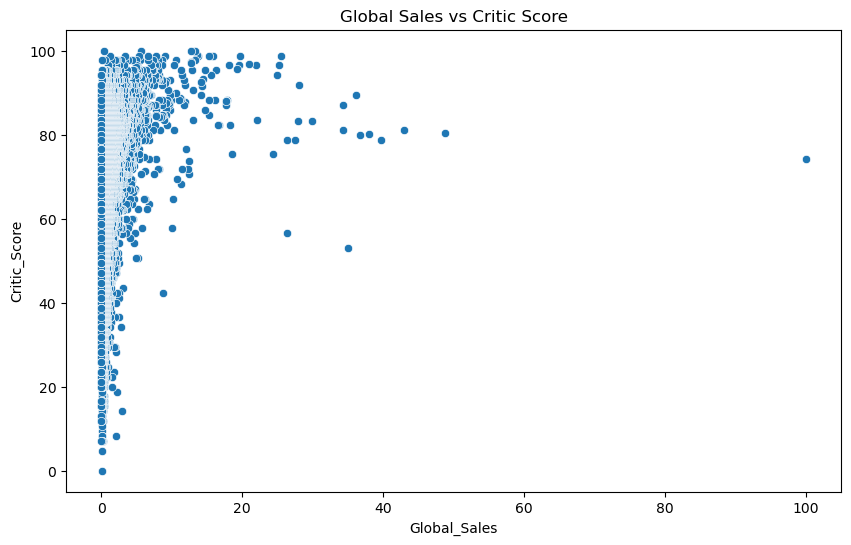

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_Sales', y='Critic_Score', data=csv)
plt.title('Global Sales vs Critic Score')
plt.show()

Grafiği incelicek olursak, belirli bir aralıkta biriktiği yorumunu yapabiliriz. Bu durumda dağılım grafiğinin yoğun bir dağılım olduğunu söyleyebiliriz. Bu dağılımı daha iyi anlayabilmek için yoğunluk ve dağılım, eğilim çizgisi, ısı haritası, aykırı değerler ve son olarak bir pairplot kullanabiliriz.

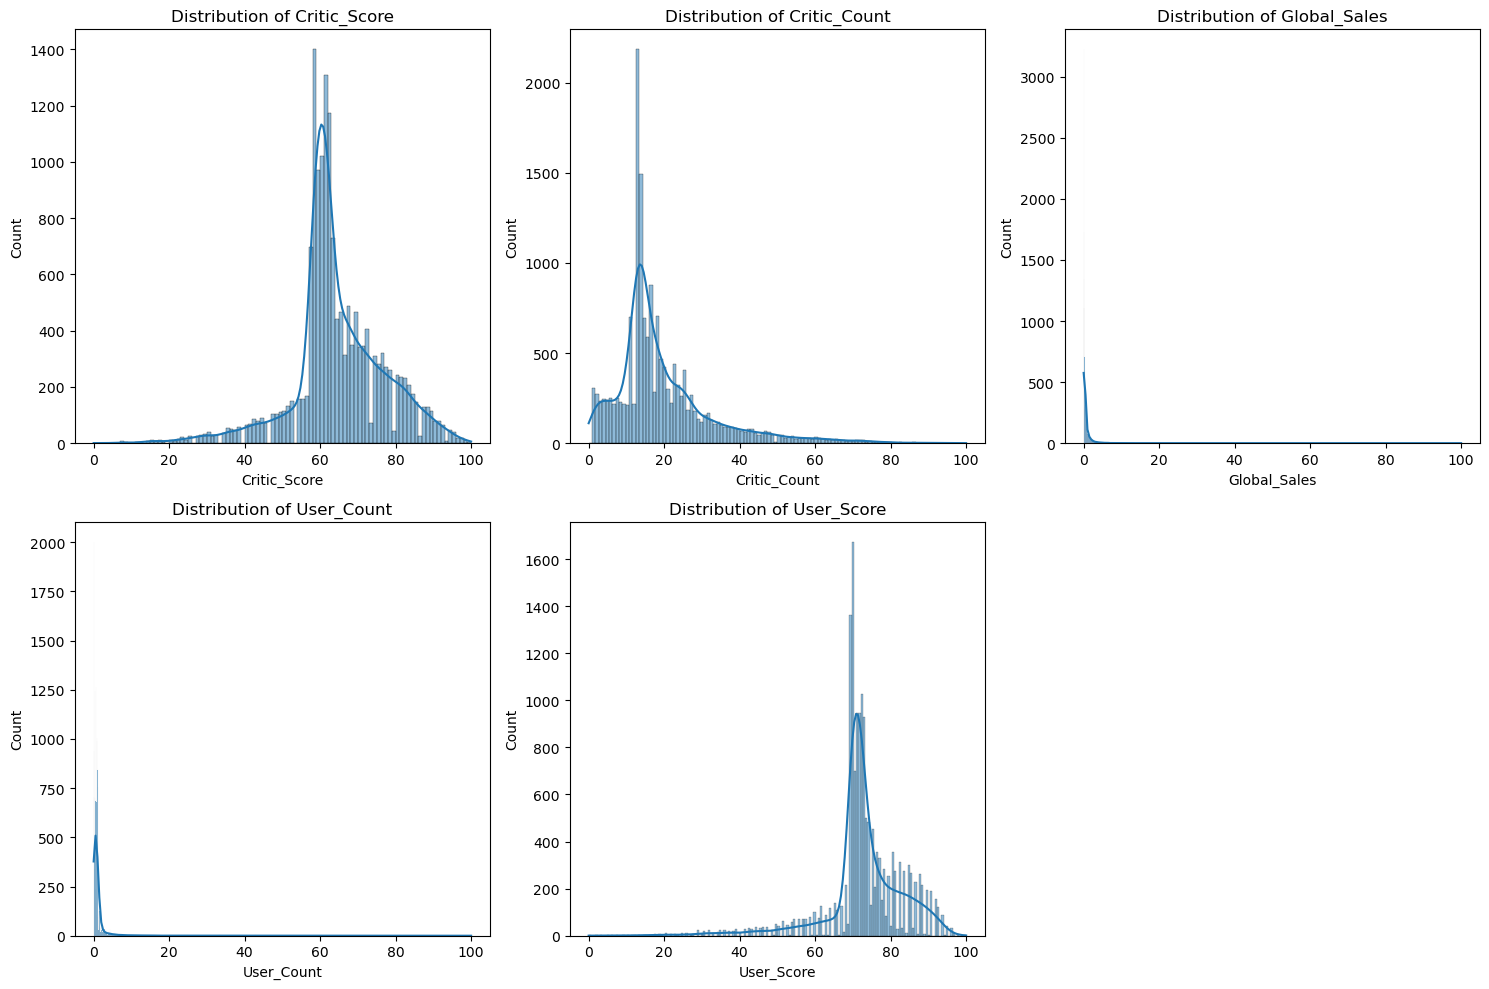

In [64]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(csv[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

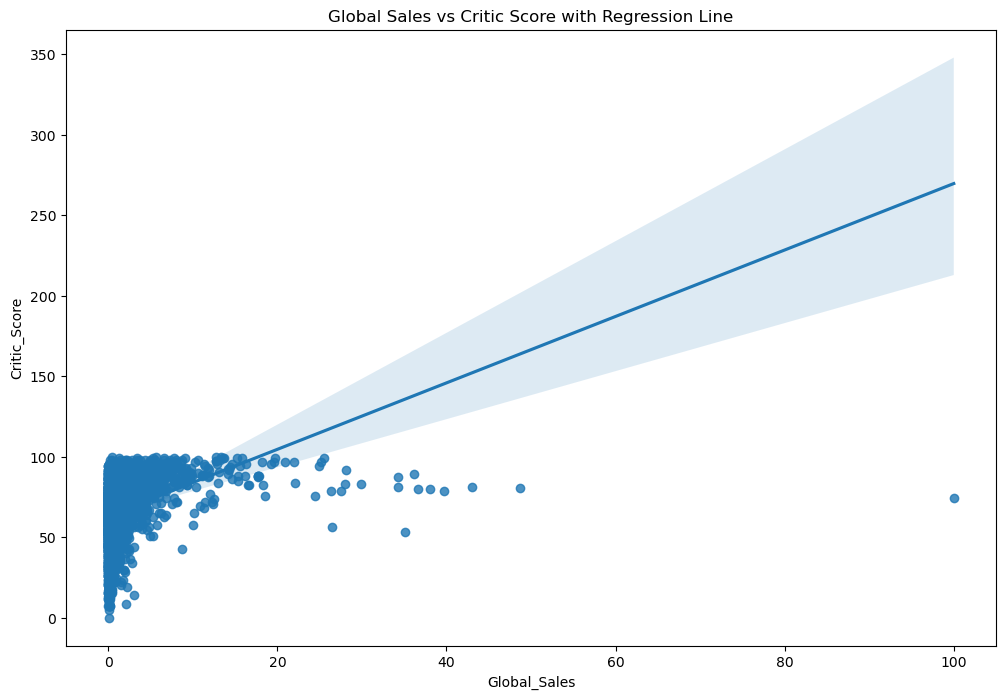

In [65]:
plt.figure(figsize=(12, 8))
sns.regplot(x='Global_Sales', y='Critic_Score', data=csv)
plt.title('Global Sales vs Critic Score with Regression Line')
plt.show()

Eğilim çizgisi dik bir açı ile yükseldiği için, iki değişken arasında pozitif bir ilişiki olduğunu söyleyebiliriz

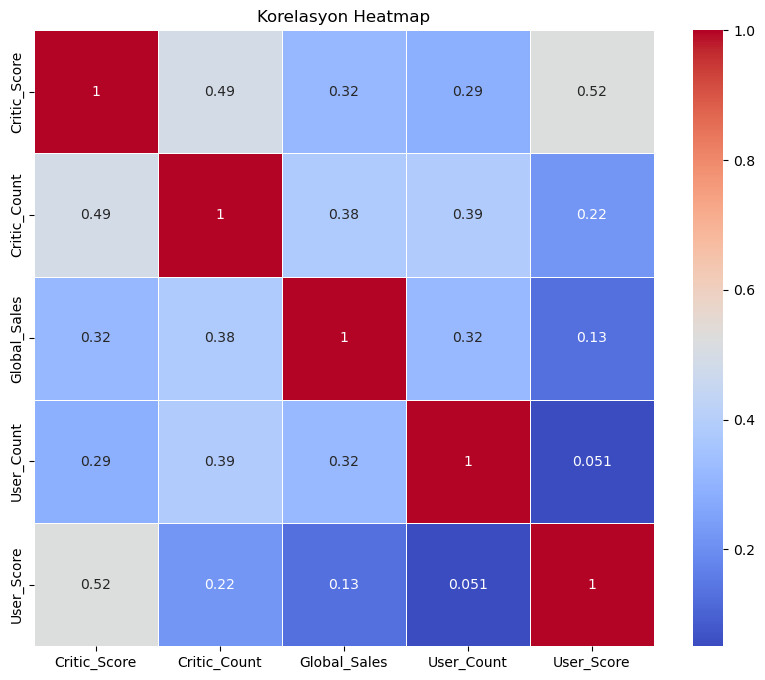

In [66]:
selected_columns = ['Critic_Score', 'Critic_Count', 'Global_Sales', 'User_Count', 'User_Score']
correlation_matrix = csv[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasyon Heatmap')
plt.show()

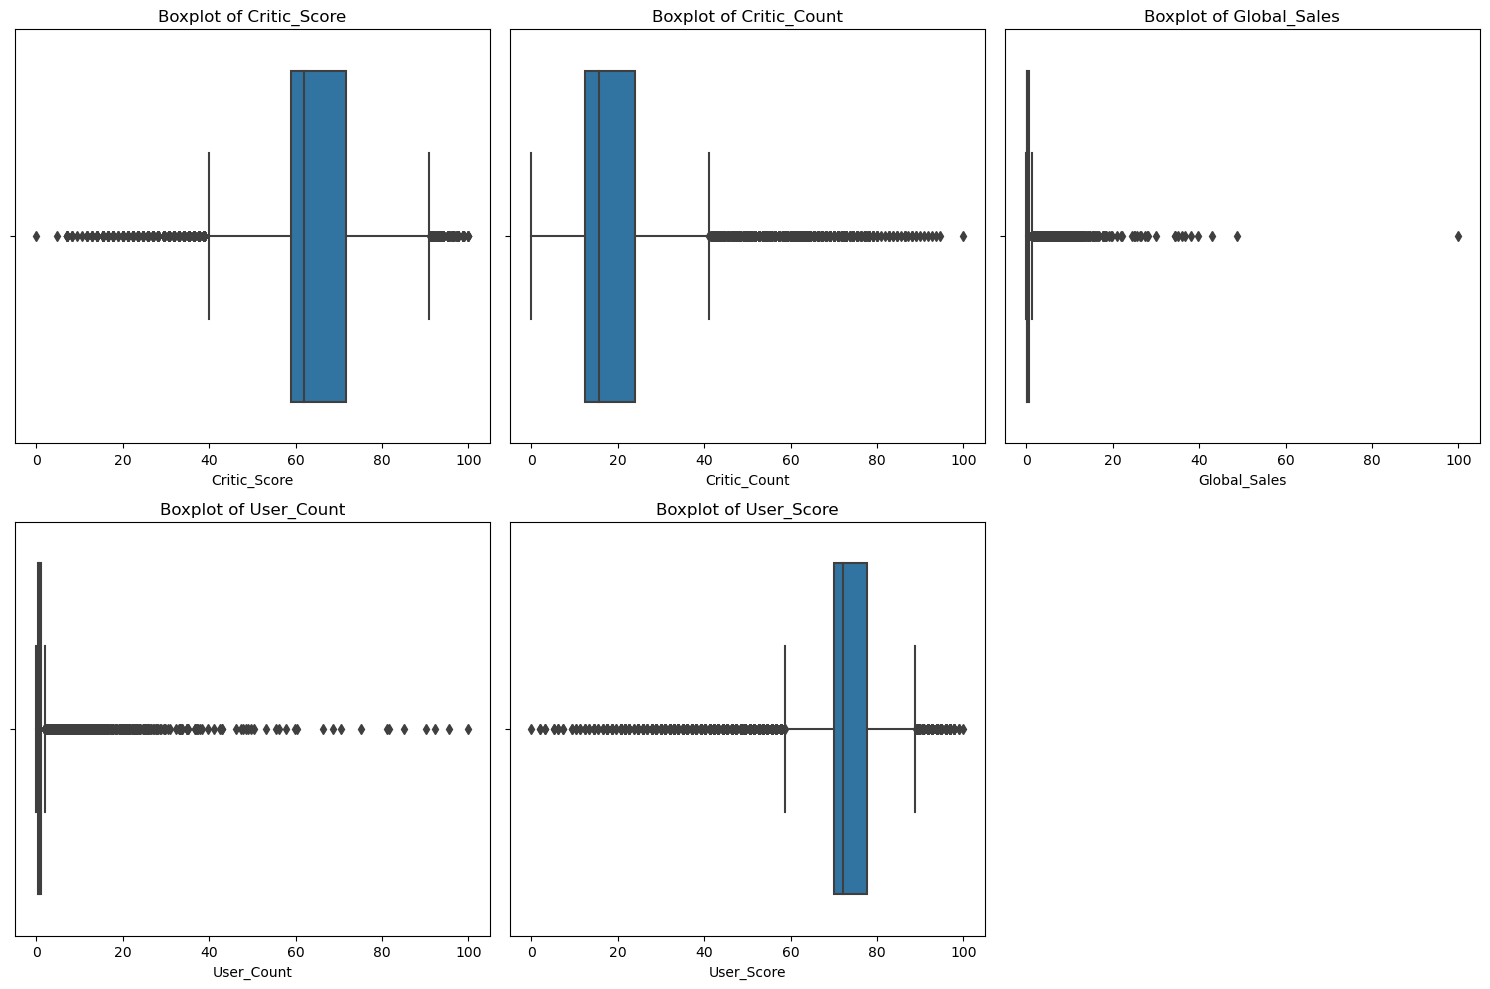

In [67]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=csv[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

C:\Users\yunus\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


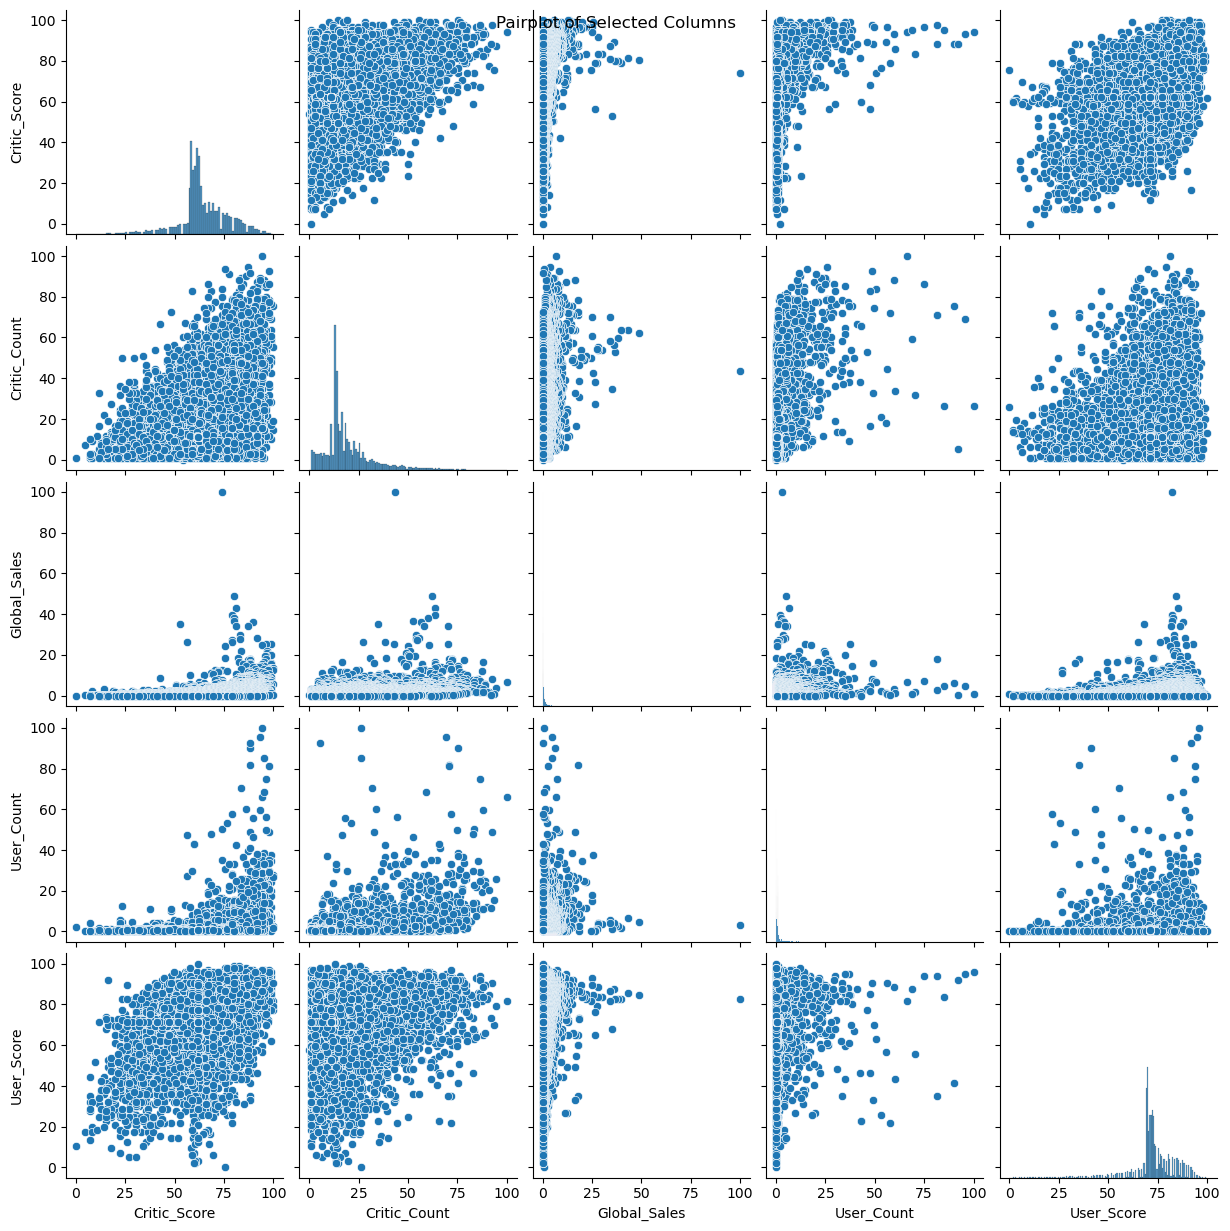

In [68]:
sns.pairplot(csv[selected_columns])
plt.suptitle('Pairplot of Selected Columns')
plt.show()

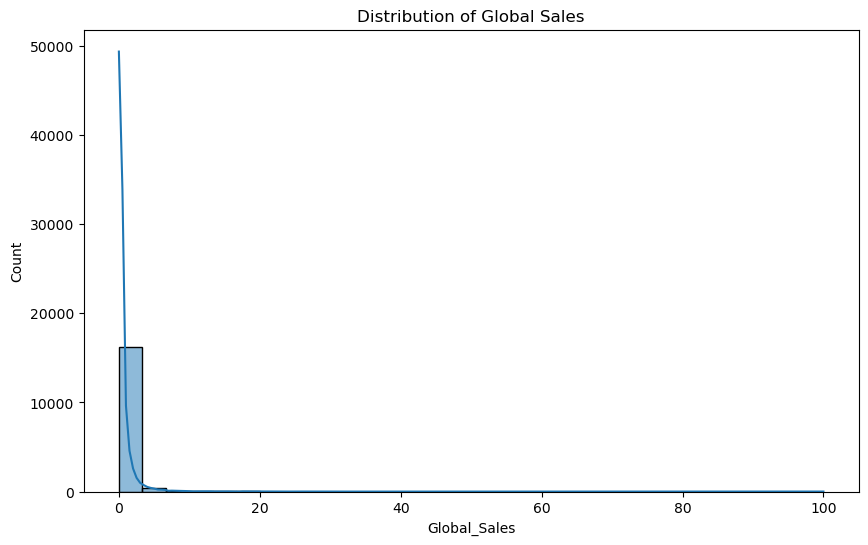

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(csv['Global_Sales'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.show()

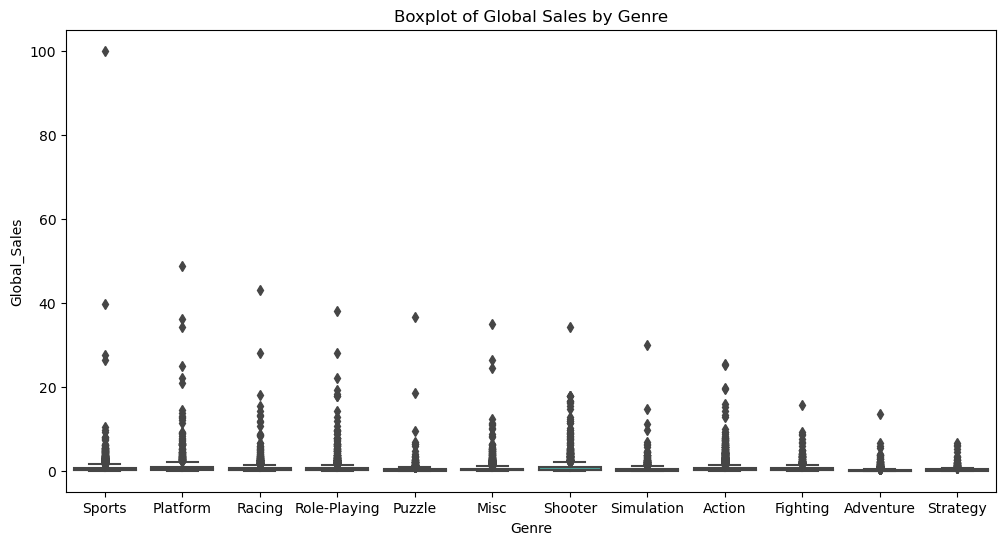

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=csv)
plt.title('Boxplot of Global Sales by Genre')
plt.show()


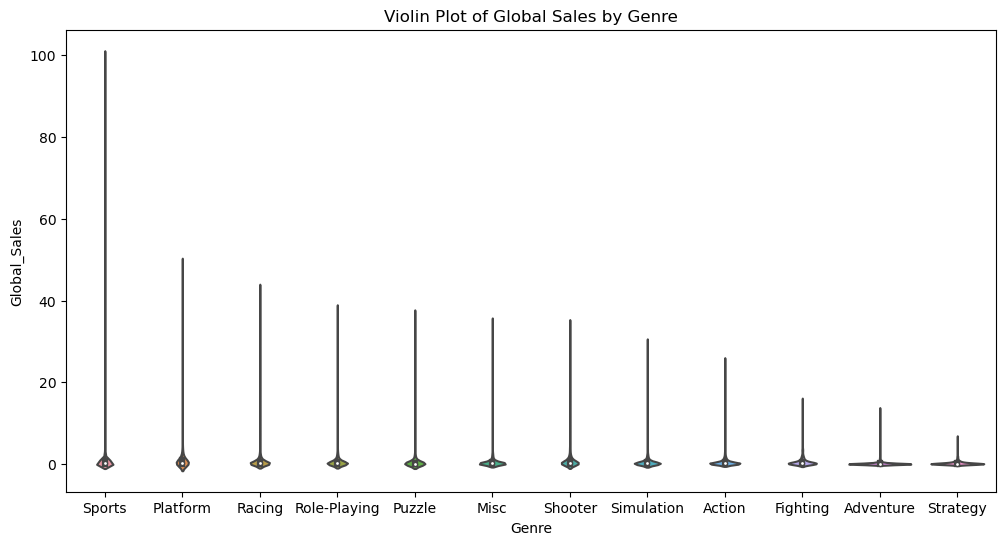

In [71]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genre', y='Global_Sales', data=csv)
plt.title('Violin Plot of Global Sales by Genre')
plt.show()

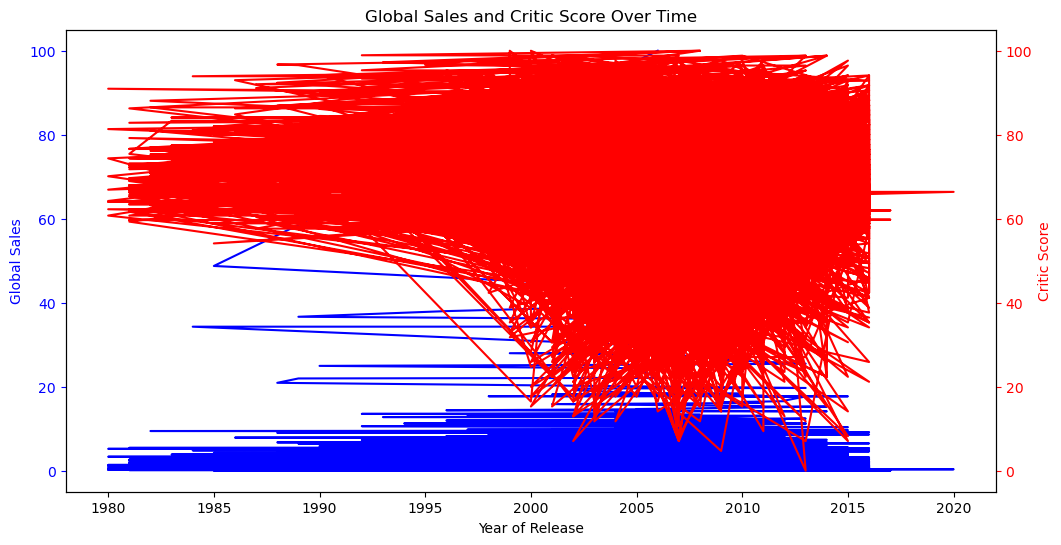

In [72]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(csv['Year_of_Release'], csv['Global_Sales'], color='blue')
ax1.set_xlabel('Year of Release')
ax1.set_ylabel('Global Sales', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(csv['Year_of_Release'], csv['Critic_Score'], color='red')
ax2.set_ylabel('Critic Score', color='red')
ax2.tick_params('y', colors='red')

plt.title('Global Sales and Critic Score Over Time')
plt.show()

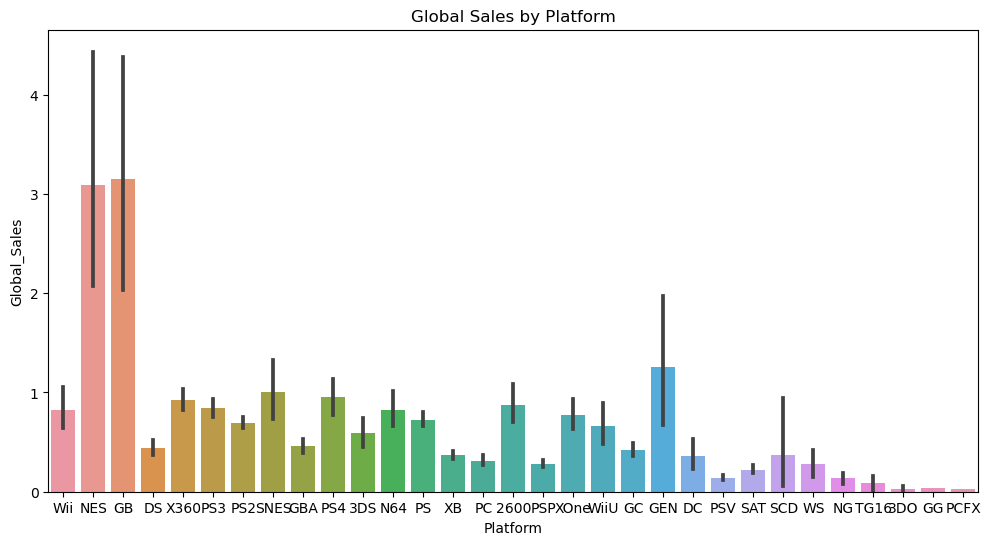

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', data=csv)
plt.title('Global Sales by Platform')
plt.show()

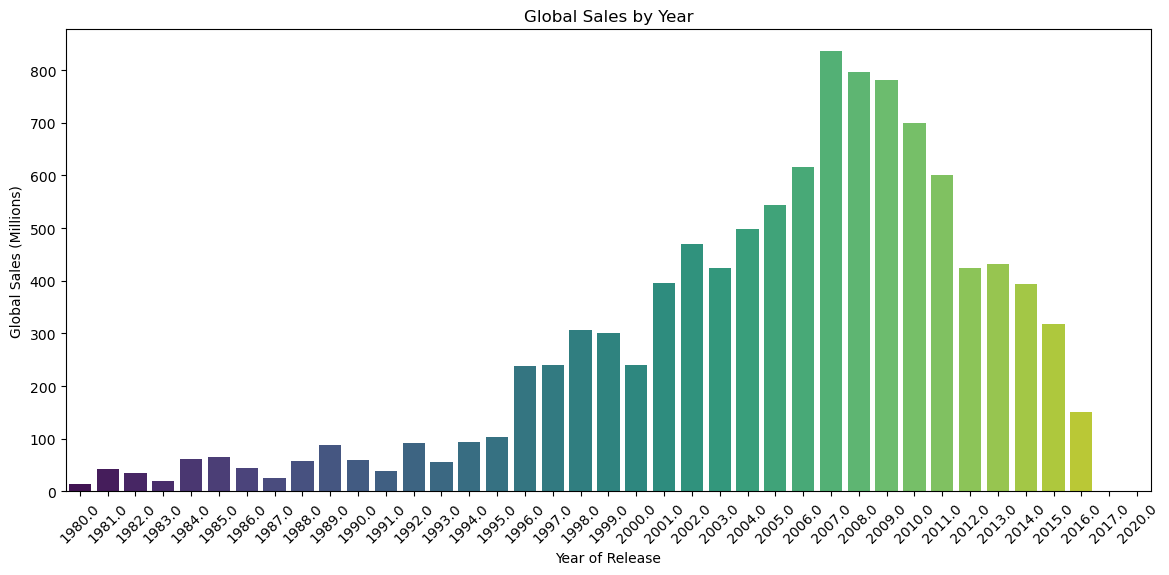

In [74]:
sales_by_year = csv.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='Year_of_Release', y='Global_Sales', data=sales_by_year, palette='viridis')
plt.title('Global Sales by Year')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

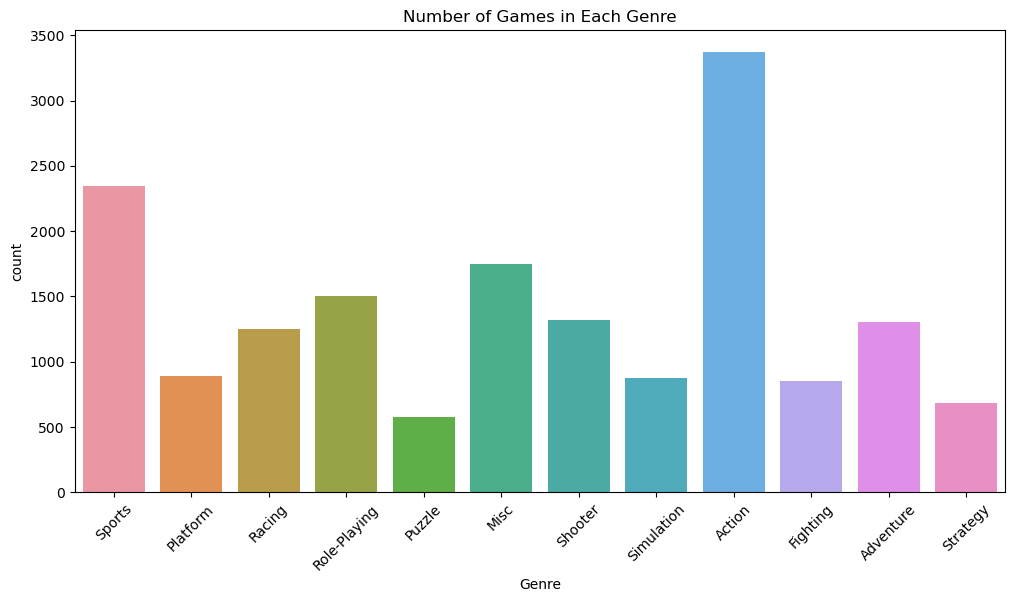

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=csv)
plt.title('Number of Games in Each Genre')
plt.xticks(rotation=45)
plt.show()

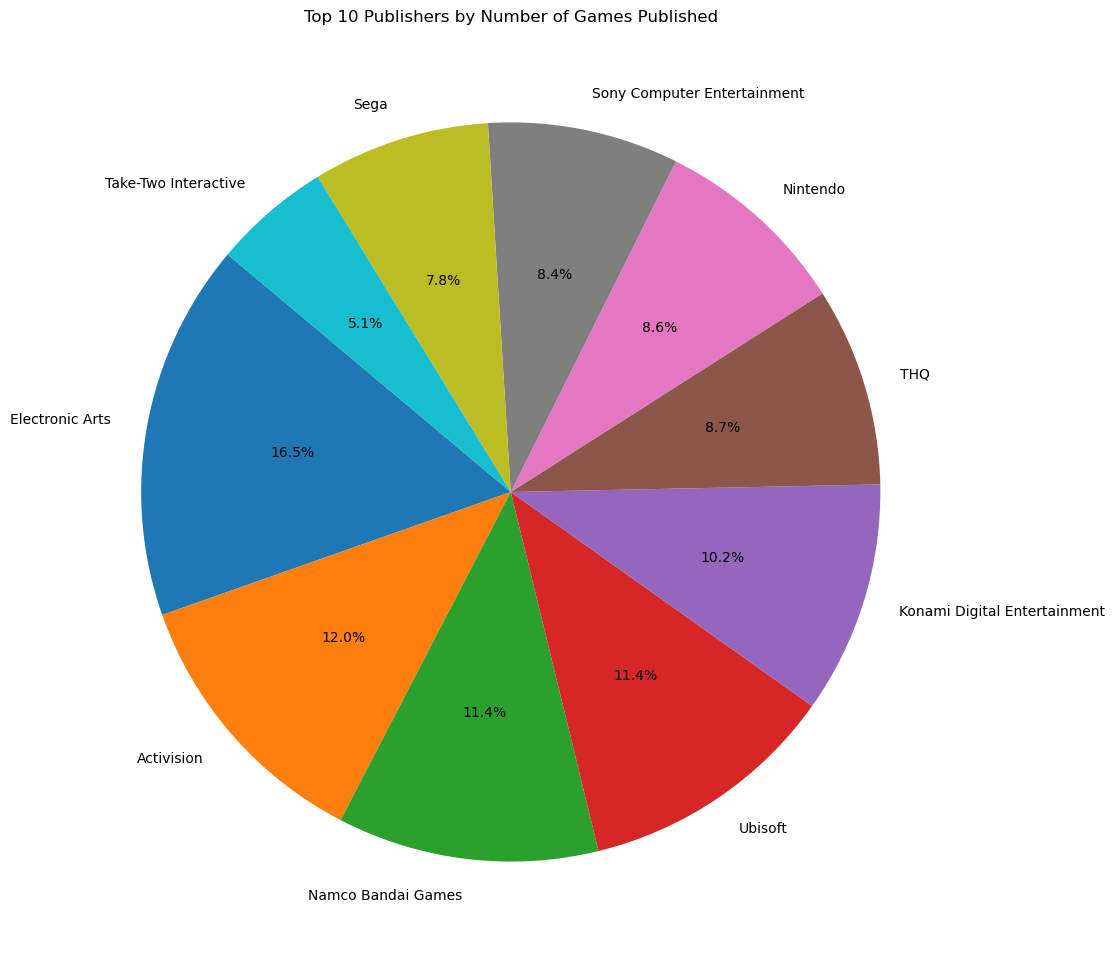

In [76]:
top_publishers = csv['Publisher'].value_counts().nlargest(10)

plt.figure(figsize=(12, 12))
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Publishers by Number of Games Published')
plt.show()

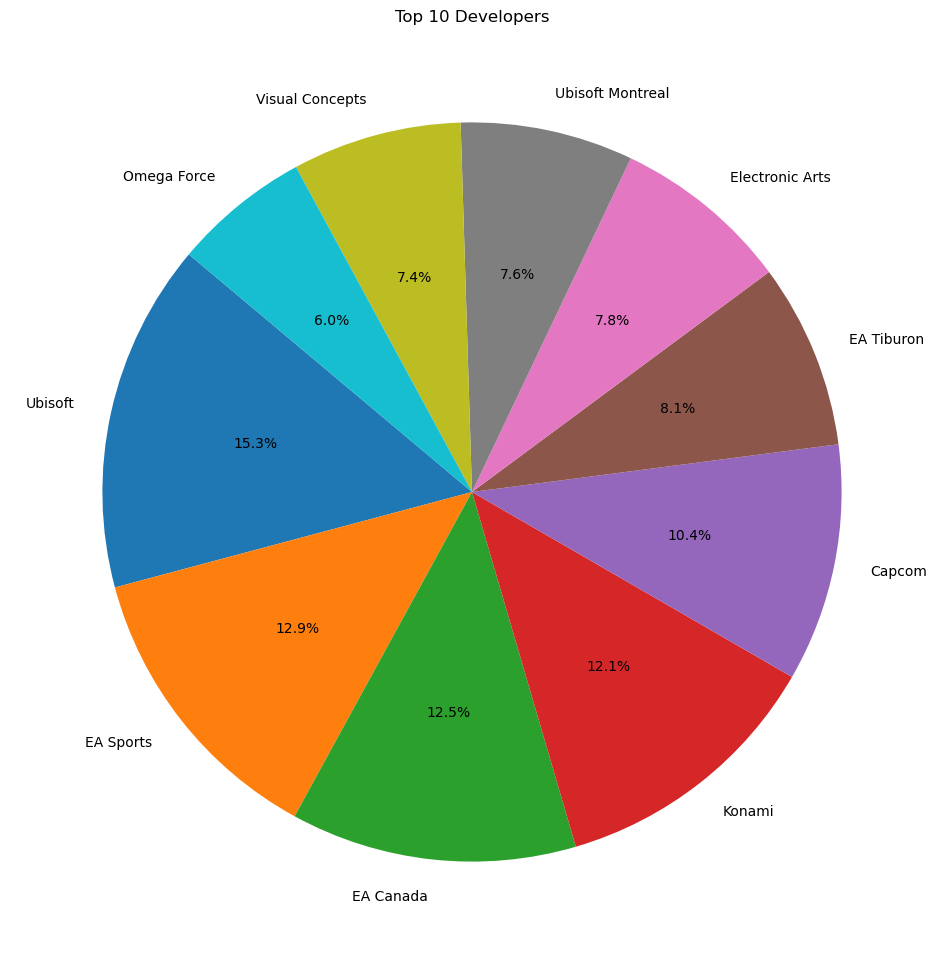

In [77]:
valid_developers = csv[csv['Developer'] != 'Unknown']['Developer'].value_counts().nlargest(10)

plt.figure(figsize=(12, 12))
plt.pie(valid_developers, labels=valid_developers.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Developers')
plt.show()

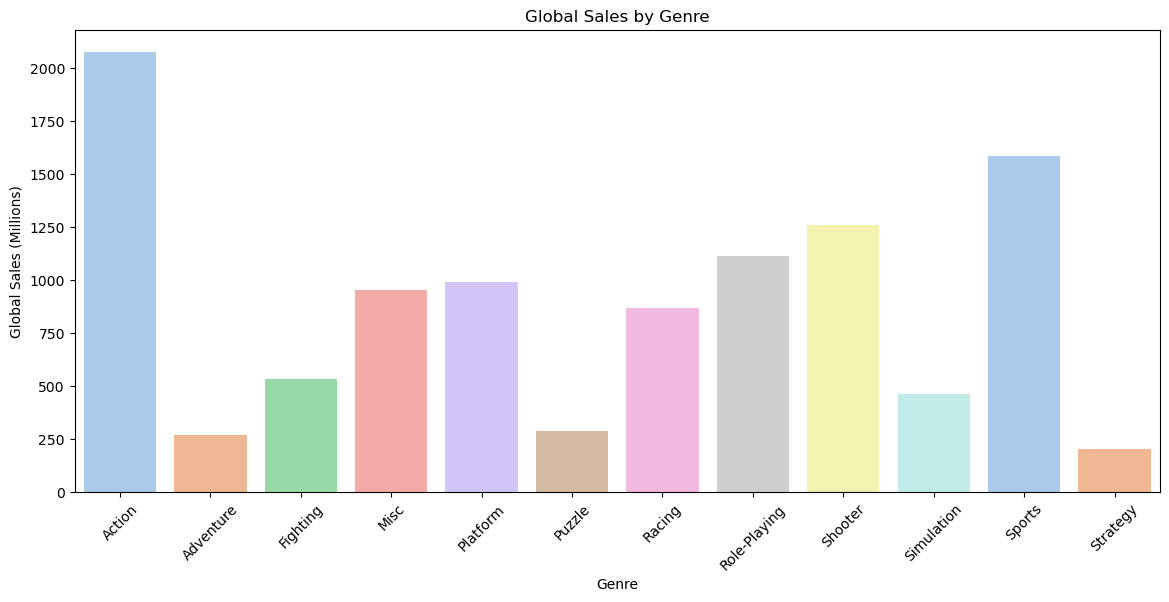

In [78]:
sales_by_genre = csv.groupby('Genre')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='Genre', y='Global_Sales', data=sales_by_genre, palette='pastel')
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

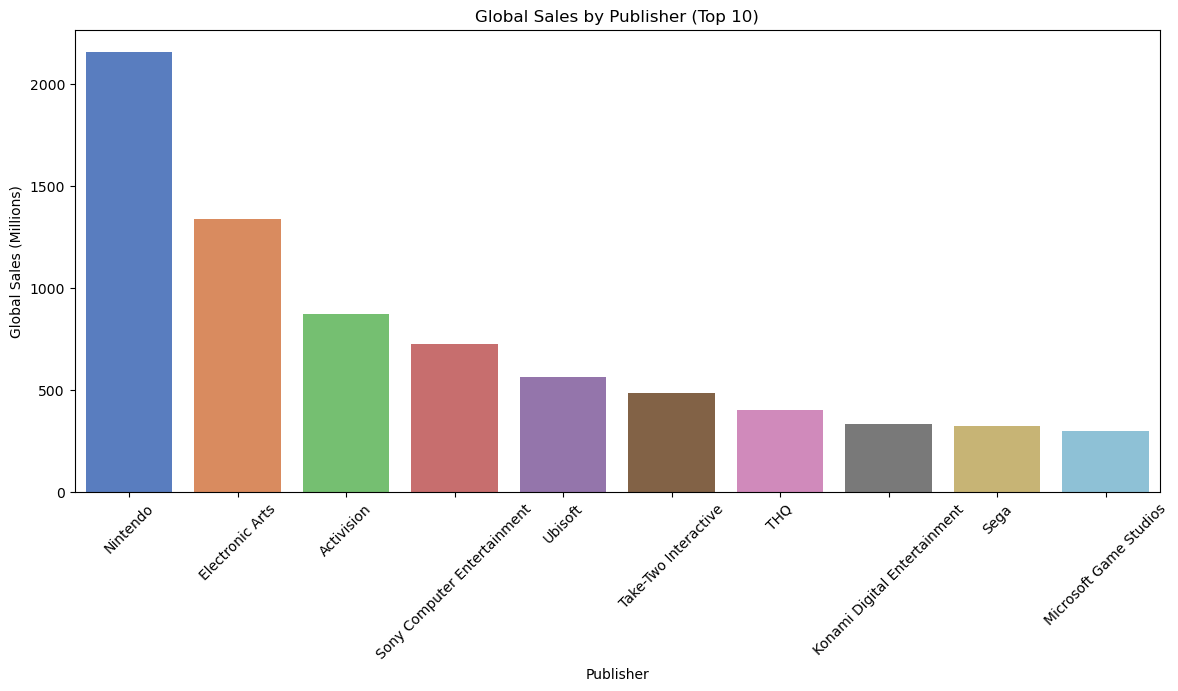

In [79]:
sales_by_publisher = csv.groupby('Publisher')['Global_Sales'].sum().reset_index()

top_publishers = sales_by_publisher.nlargest(10, 'Global_Sales')

plt.figure(figsize=(14, 6))
sns.barplot(x='Publisher', y='Global_Sales', data=top_publishers, palette='muted')
plt.title('Global Sales by Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

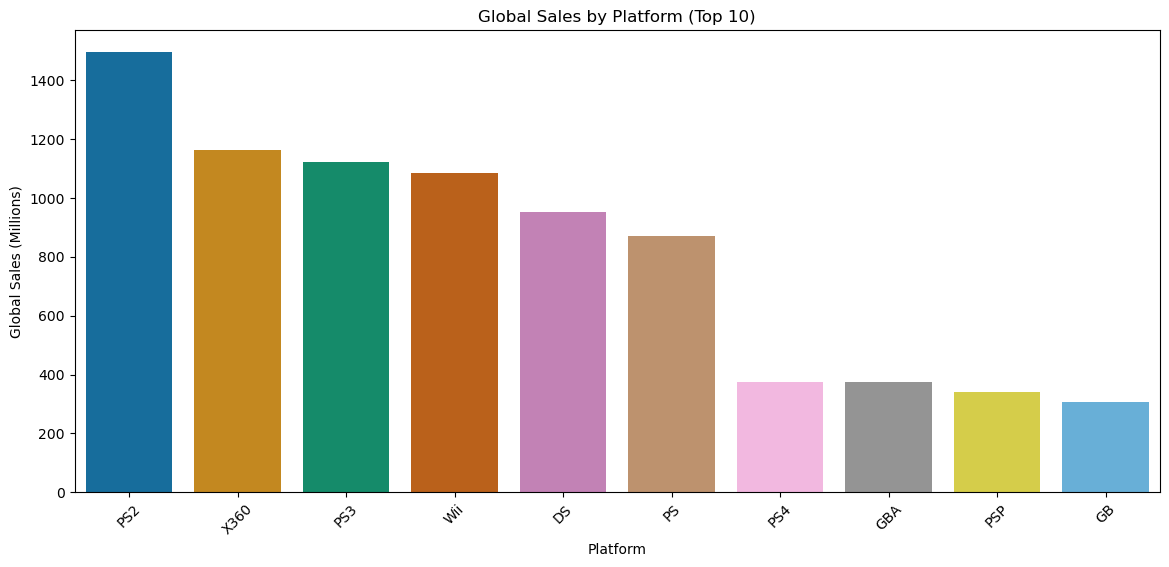

In [80]:
sales_by_platform = csv.groupby('Platform')['Global_Sales'].sum().reset_index()

top_platforms = sales_by_platform.nlargest(10, 'Global_Sales')

plt.figure(figsize=(14, 6))
sns.barplot(x='Platform', y='Global_Sales', data=top_platforms, palette='colorblind')
plt.title('Global Sales by Platform (Top 10)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

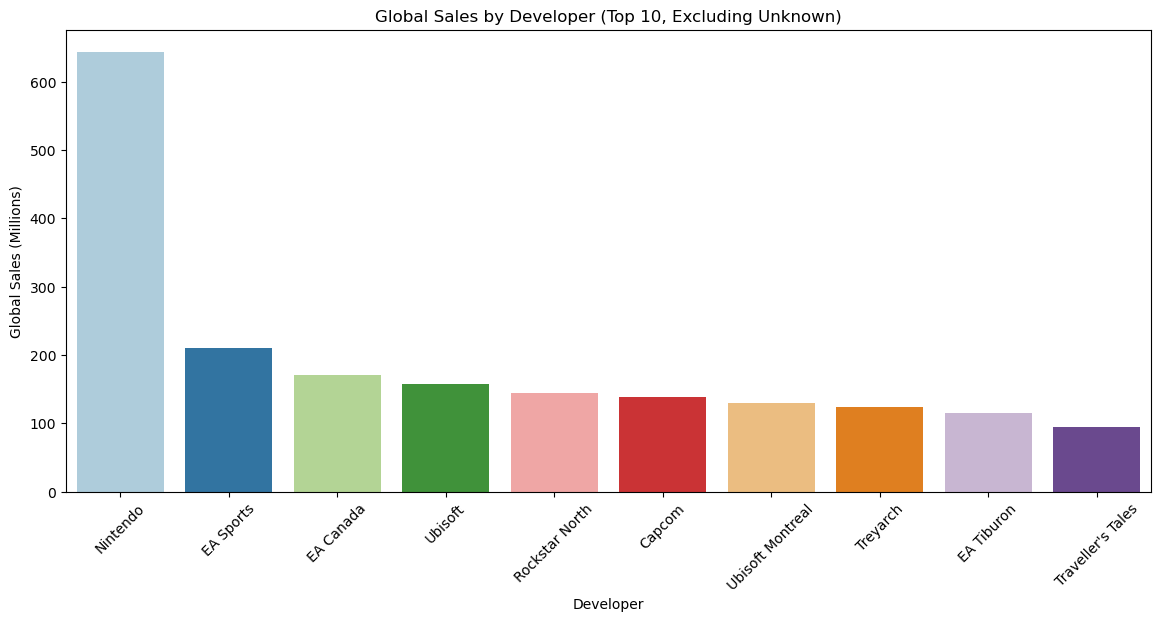

In [81]:
filtered_csv = csv[csv['Developer'] != 'Unknown']

sales_by_developer = filtered_csv.groupby('Developer')['Global_Sales'].sum().reset_index()

top_developers = sales_by_developer.nlargest(10, 'Global_Sales')

plt.figure(figsize=(14, 6))
sns.barplot(x='Developer', y='Global_Sales', data=top_developers, palette='Paired')
plt.title('Global Sales by Developer (Top 10, Excluding Unknown)')
plt.xlabel('Developer')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

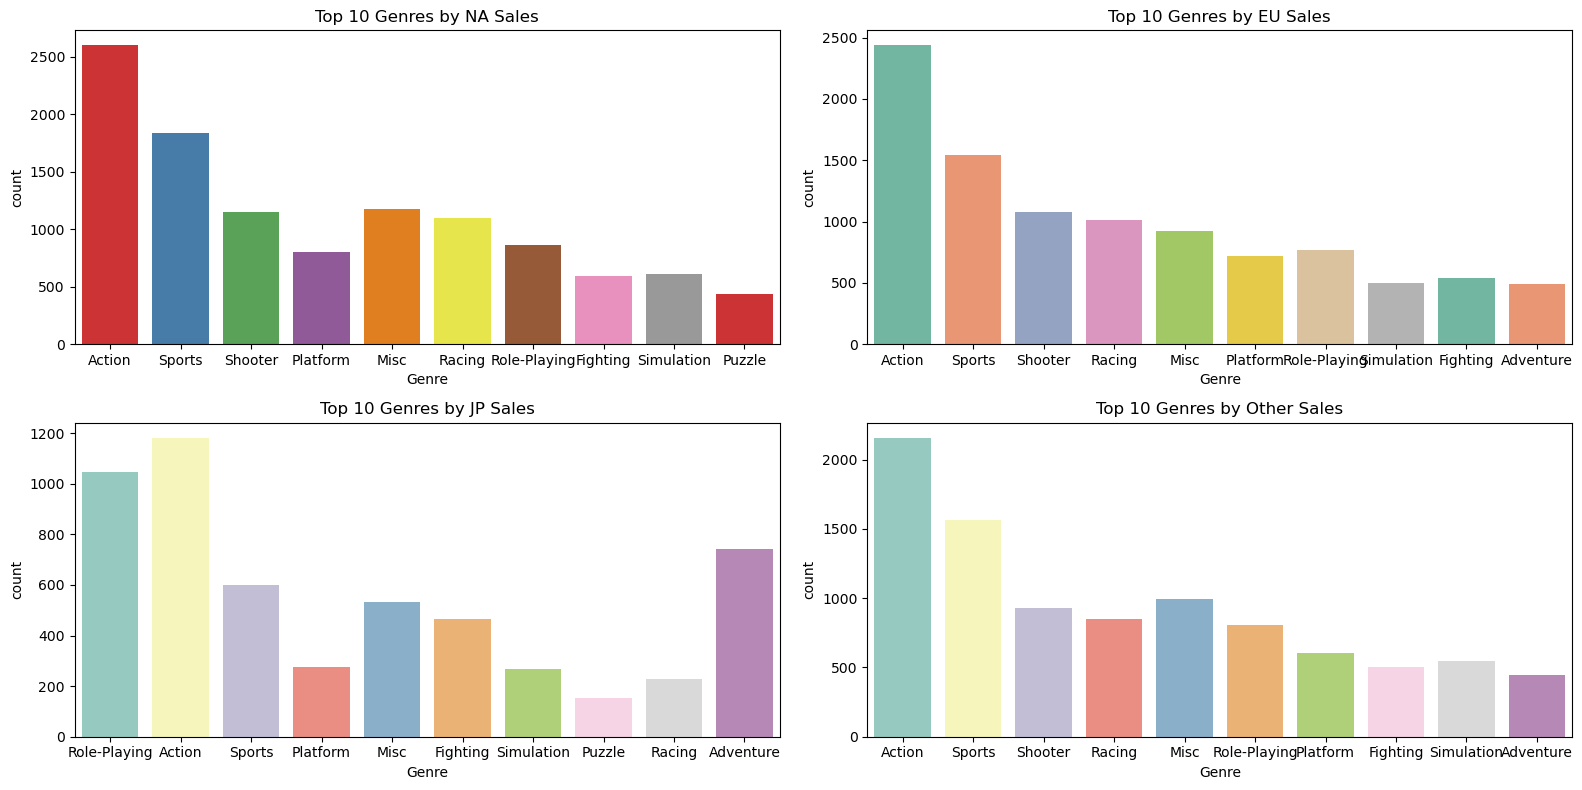

In [82]:
filtered_csv = csv[csv['Publisher'] != 'Unknown']

def top_genres_by_sales(df, sales_column):
    sales_by_genre = df.groupby('Genre')[sales_column].sum()
    top_genres = sales_by_genre.sort_values(ascending=False).head(10).index
    return top_genres

top_na_genres = top_genres_by_sales(filtered_csv, 'NA_Sales')
top_eu_genres = top_genres_by_sales(filtered_csv, 'EU_Sales')
top_jp_genres = top_genres_by_sales(filtered_csv, 'JP_Sales')
top_other_genres = top_genres_by_sales(filtered_csv, 'Other_Sales')

top_genres_data = filtered_csv[filtered_csv['Genre'].isin(top_na_genres) | 
                                filtered_csv['Genre'].isin(top_eu_genres) | 
                                filtered_csv['Genre'].isin(top_jp_genres) | 
                                filtered_csv['Genre'].isin(top_other_genres)]

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Genre', data=top_genres_data[top_genres_data['NA_Sales'] > 0], palette='Set1', order=top_na_genres)
plt.title('Top 10 Genres by NA Sales')

plt.subplot(2, 2, 2)
sns.countplot(x='Genre', data=top_genres_data[top_genres_data['EU_Sales'] > 0], palette='Set2', order=top_eu_genres)
plt.title('Top 10 Genres by EU Sales')

plt.subplot(2, 2, 3)
sns.countplot(x='Genre', data=top_genres_data[top_genres_data['JP_Sales'] > 0], palette='Set3', order=top_jp_genres)
plt.title('Top 10 Genres by JP Sales')

plt.subplot(2, 2, 4)
sns.countplot(x='Genre', data=top_genres_data[top_genres_data['Other_Sales'] > 0], palette='Set3', order=top_other_genres)
plt.title('Top 10 Genres by Other Sales')

plt.tight_layout()
plt.show()

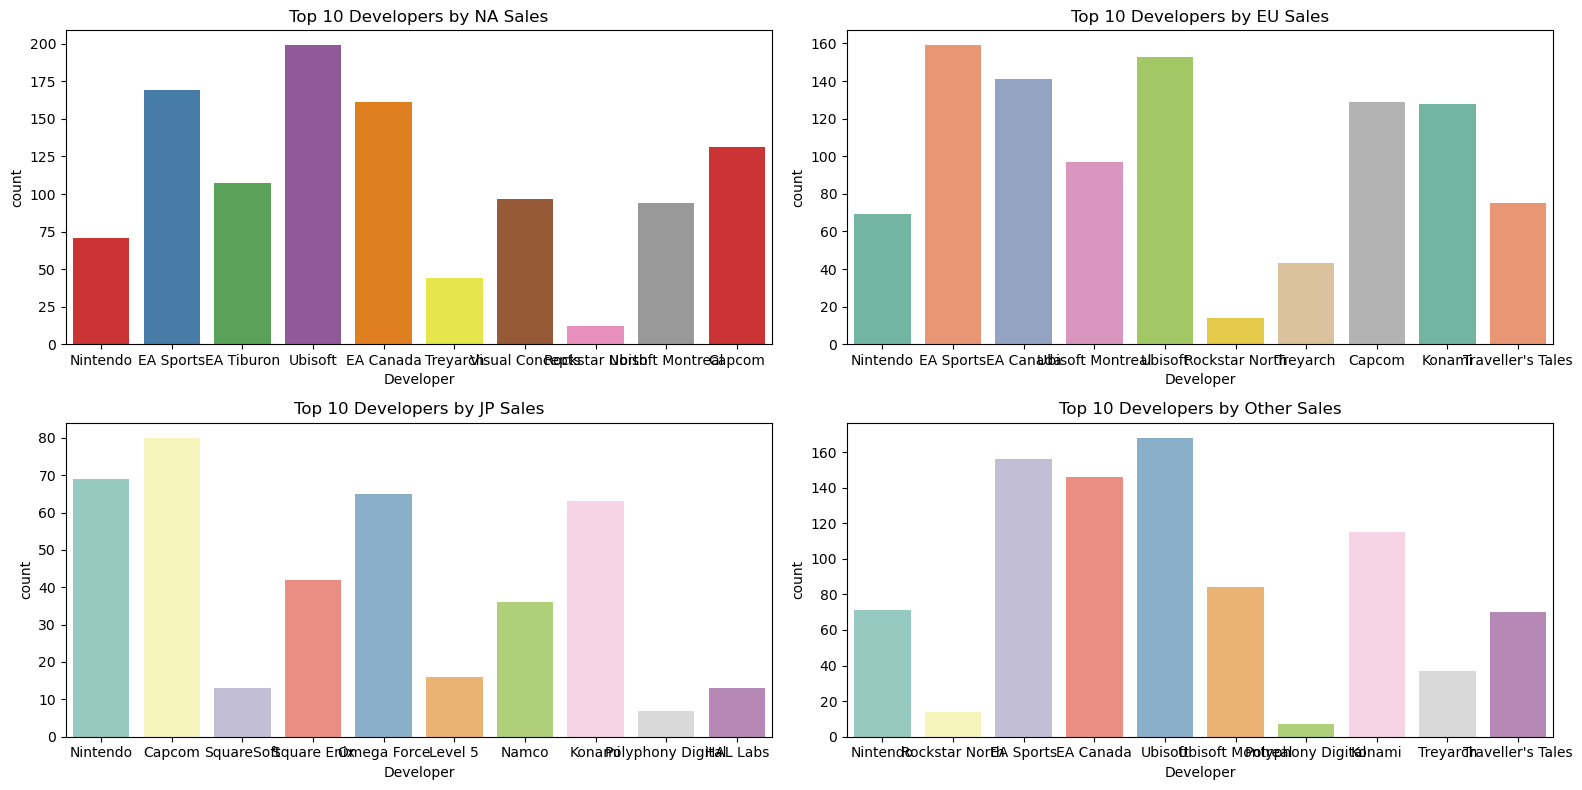

In [83]:
filtered_csv = csv[csv['Developer'] != 'Unknown']

def top_developers_by_sales(df, sales_column):
    sales_by_developer = df.groupby('Developer')[sales_column].sum()
    top_developers = sales_by_developer.sort_values(ascending=False).head(10).index
    return top_developers

top_na_developers = top_developers_by_sales(filtered_csv, 'NA_Sales')
top_eu_developers = top_developers_by_sales(filtered_csv, 'EU_Sales')
top_jp_developers = top_developers_by_sales(filtered_csv, 'JP_Sales')
top_other_developers = top_developers_by_sales(filtered_csv, 'Other_Sales')

top_developers_data = filtered_csv[filtered_csv['Developer'].isin(top_na_developers) | 
                                    filtered_csv['Developer'].isin(top_eu_developers) | 
                                    filtered_csv['Developer'].isin(top_jp_developers) | 
                                    filtered_csv['Developer'].isin(top_other_developers)]

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Developer', data=top_developers_data[top_developers_data['NA_Sales'] > 0], palette='Set1', order=top_na_developers)
plt.title('Top 10 Developers by NA Sales')

plt.subplot(2, 2, 2)
sns.countplot(x='Developer', data=top_developers_data[top_developers_data['EU_Sales'] > 0], palette='Set2', order=top_eu_developers)
plt.title('Top 10 Developers by EU Sales')

plt.subplot(2, 2, 3)
sns.countplot(x='Developer', data=top_developers_data[top_developers_data['JP_Sales'] > 0], palette='Set3', order=top_jp_developers)
plt.title('Top 10 Developers by JP Sales')

plt.subplot(2, 2, 4)
sns.countplot(x='Developer', data=top_developers_data[top_developers_data['Other_Sales'] > 0], palette='Set3', order=top_other_developers)
plt.title('Top 10 Developers by Other Sales')

plt.tight_layout()
plt.show()

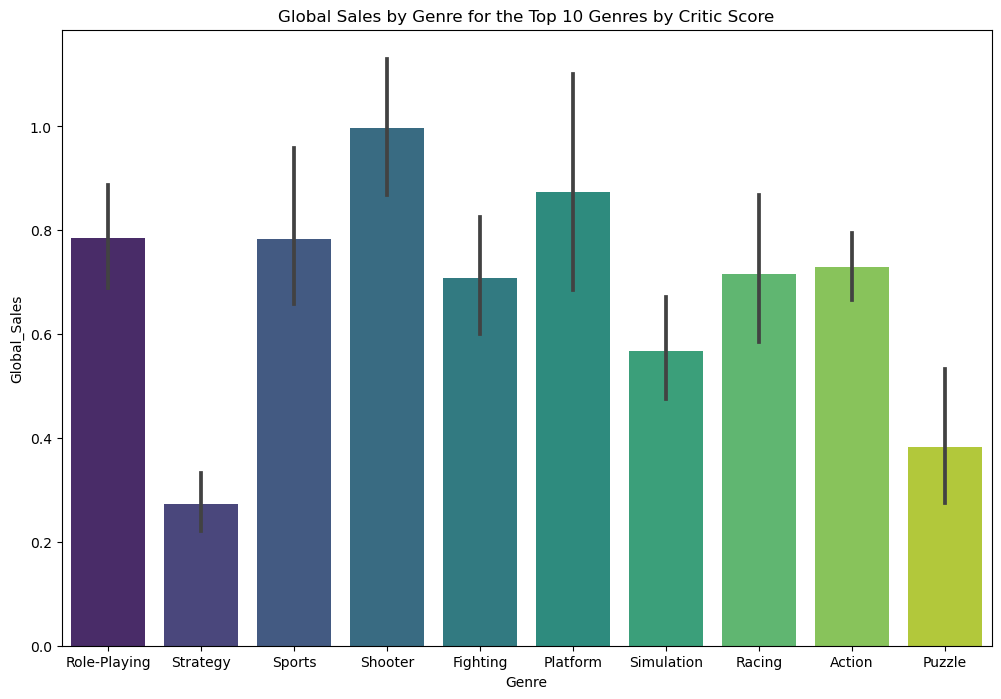

In [84]:
filtered_csv = csv[csv['Developer'] != 'Unknown']

def top_genres_by_score(df, top_count=10):
    top_genres = df.groupby('Genre')['Critic_Score'].mean().nlargest(top_count).index
    return top_genres


top_genres = top_genres_by_score(filtered_csv)

top_genres_data = filtered_csv[filtered_csv['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='Global_Sales', data=top_genres_data, palette='viridis', order=top_genres)
plt.title('Global Sales by Genre for the Top 10 Genres by Critic Score')
plt.show()


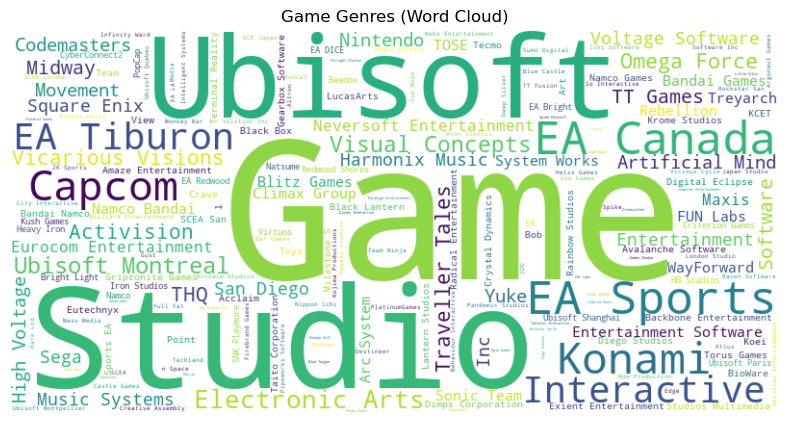

In [85]:
filtered_csv = csv[csv['Developer'] != 'Unknown']

text_data = ' '.join(filtered_csv['Developer'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Game Genres (Word Cloud)')
plt.show()

### 

## Machine Learning

### Linear Regression

Linear Regression Results:
  Mean Squared Error: 0.00004
  R-squared: 0.99999
  Mean Absolute Error: 0.00354


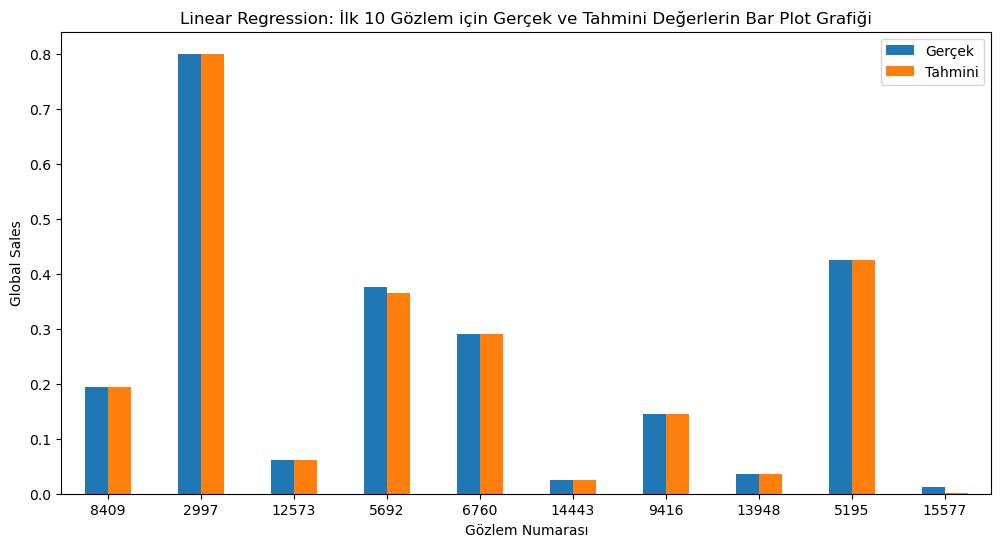

In [86]:
selected_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']

X = csv[selected_columns].drop('Global_Sales', axis=1)
y = csv['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

print("Linear Regression Results:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.5f}")
print(f"  R-squared: {r2_score(y_test, y_pred):.5f}")
print(f"  Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.5f}")

results_lr = pd.DataFrame({'Gerçek': y_test, 'Tahmini': y_pred})

results_lr = pd.DataFrame({'Gerçek': y_test, 'Tahmini': y_pred})

total_values = pd.DataFrame({
    'Toplam': [results_lr['Gerçek'].sum(), results_lr['Tahmini'].sum()]
}, index=['Gerçek', 'Tahmini'])

plt.figure(figsize=(12, 6))
results_lr[['Gerçek', 'Tahmini']].sample(10).plot(kind='bar', ax=plt.gca())
plt.title('Linear Regression: İlk 10 Gözlem için Gerçek ve Tahmini Değerlerin Bar Plot Grafiği')
plt.xlabel('Gözlem Numarası')
plt.ylabel('Global Sales')
plt.xticks(rotation=0)
plt.show()

### Gradient Boosting

Gradient Boosting Results:
  Mean Squared Error: 0.89174
  R-squared: 0.85296
  Mean Absolute Error: 0.05420


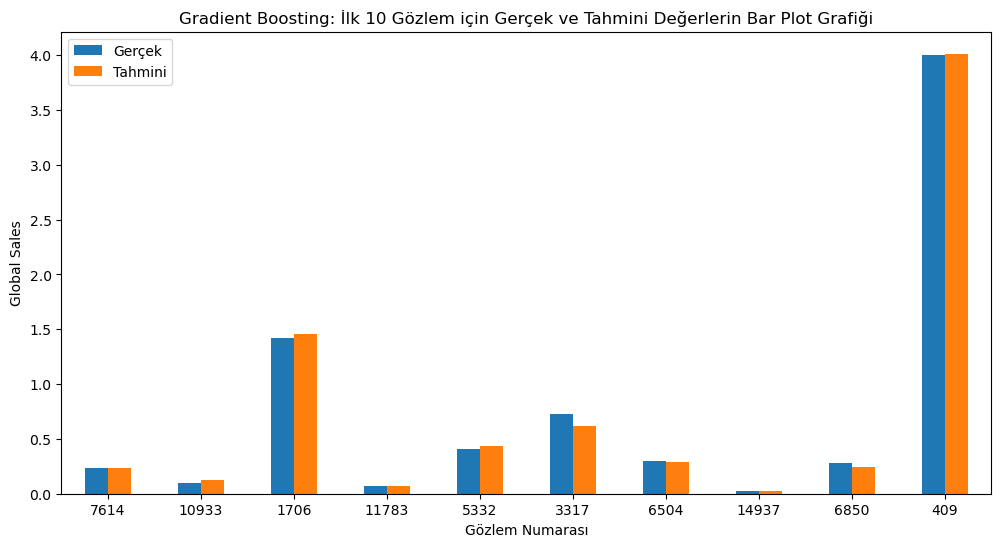

In [87]:
selected_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']

X = csv[selected_columns].drop('Global_Sales', axis=1)
y = csv['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

y_pred = gradient_boosting_model.predict(X_test)

print("Gradient Boosting Results:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.5f}")
print(f"  R-squared: {r2_score(y_test, y_pred):.5f}")
print(f"  Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.5f}")

results_gb = pd.DataFrame({'Gerçek': y_test, 'Tahmini': y_pred})

plt.figure(figsize=(12, 6))
results_gb[['Gerçek', 'Tahmini']].sample(10).plot(kind='bar', ax=plt.gca())
plt.title('Gradient Boosting: İlk 10 Gözlem için Gerçek ve Tahmini Değerlerin Bar Plot Grafiği')
plt.xlabel('Gözlem Numarası')
plt.ylabel('Global Sales')
plt.xticks(rotation=0)
plt.show()

### Random Forest

Random Forest Results:
  Mean Squared Error: 1.27058
  R-squared: 0.79050
  Mean Absolute Error: 0.05131


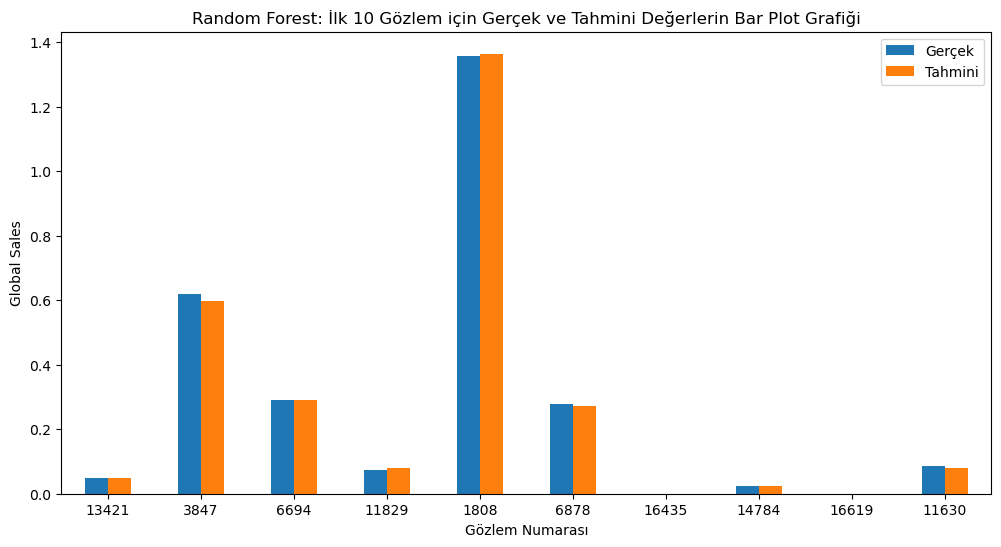

In [88]:
selected_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']

X = csv[selected_columns].drop('Global_Sales', axis=1)
y = csv['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

print("Random Forest Results:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.5f}")
print(f"  R-squared: {r2_score(y_test, y_pred):.5f}")
print(f"  Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.5f}")

results_rf = pd.DataFrame({'Gerçek': y_test, 'Tahmini': y_pred})

plt.figure(figsize=(12, 6))
results_rf[['Gerçek', 'Tahmini']].sample(10).plot(kind='bar', ax=plt.gca())
plt.title('Random Forest: İlk 10 Gözlem için Gerçek ve Tahmini Değerlerin Bar Plot Grafiği')
plt.xlabel('Gözlem Numarası')
plt.ylabel('Global Sales')
plt.xticks(rotation=0)
plt.show()

### Ridge Regression

Ridge Regression Results:
  Mean Squared Error: 0.00004
  R-squared: 0.99999
  Mean Absolute Error: 0.00354


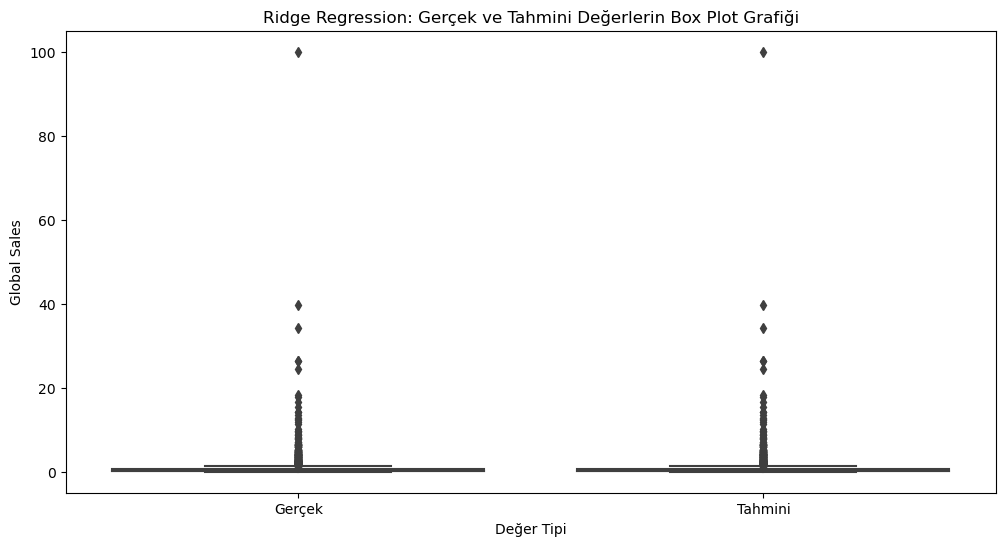

In [89]:
selected_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']

X = csv[selected_columns].drop('Global_Sales', axis=1)
y = csv['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

print("Ridge Regression Results:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.5f}")
print(f"  R-squared: {r2_score(y_test, y_pred):.5f}")
print(f"  Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.5f}")

plt.figure(figsize=(12, 6))
sns.boxplot(data=results_lr[['Gerçek', 'Tahmini']])
plt.title('Ridge Regression: Gerçek ve Tahmini Değerlerin Box Plot Grafiği')
plt.xlabel('Değer Tipi')
plt.ylabel('Global Sales')
plt.show()

### XGBoost

XGBoost Results:
  Mean Squared Error: 0.91897
  R-squared: 0.84847
  Mean Absolute Error: 0.05009


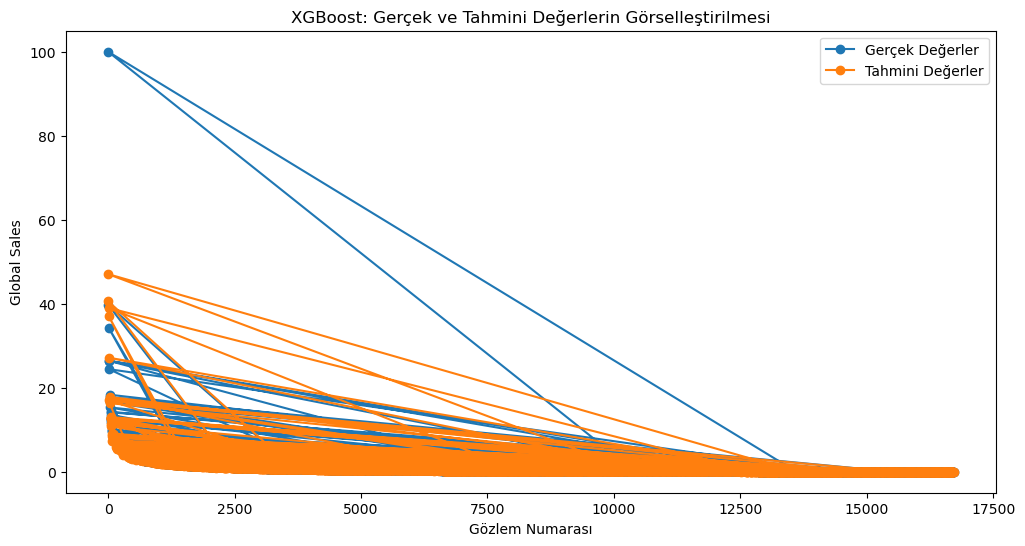

In [90]:
selected_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']

X = csv[selected_columns].drop('Global_Sales', axis=1)
y = csv['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("XGBoost Results:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.5f}")
print(f"  R-squared: {r2_score(y_test, y_pred):.5f}")
print(f"  Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.5f}")

results_xgb = pd.DataFrame({'Gerçek': y_test, 'Tahmini': y_pred})

plt.figure(figsize=(12, 6))
plt.plot(results_xgb.index, results_xgb['Gerçek'], label='Gerçek Değerler', marker='o')
plt.plot(results_xgb.index, results_xgb['Tahmini'], label='Tahmini Değerler', marker='o')
plt.title('XGBoost: Gerçek ve Tahmini Değerler')
plt.xlabel('Gözlem Numarası')
plt.ylabel('Global Sales')
plt.legend()
plt.show()

## Evaluation Criteria

In [91]:
d_olcut_data = np.array([[0.00004, 0.91048, 1.21951, 0.00004, 0.92459], 
                         [0.99999, 0.84987, 0.79892, 0.99999, 0.84755], 
                         [0.00354, 0.05445, 0.05124, 0.00354, 0.05055]])

d_olcut_column = ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Ridge Regression', 'XGBoost']

d_olcut_index = ['Mean Squared Error', 'R-squared', 'Mean Absolute Error']

pd.DataFrame(data = d_olcut_data, index= d_olcut_index, columns = d_olcut_column, dtype = "float")

,Linear Regression,Gradient Boosting,Random Forest,Ridge Regression,XGBoost
Mean Squared Error,0.00004,0.91048,1.21951,0.00004,0.92459
R-squared,0.99999,0.84987,0.79892,0.99999,0.84755
Mean Absolute Error,0.00354,0.05445,0.05124,0.00354,0.05055
